## Gradient Descent (Part 1)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
plt.rcParams["figure.figsize"] = (8, 8) #Change matplotlib Box Size
plt.rcParams["font.size"] = 14 #Change matplotlib Font Size

### Import Data

In [3]:
data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/Salary_Data.csv')
#To Do: Spit the data to X and y

data.head(5)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data_x = data['YearsExperience']
data_y = data['Salary']

### Plot Data

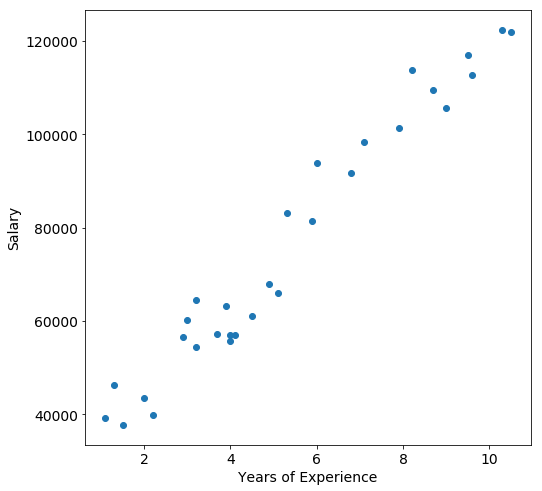

In [5]:
plt.plot(data_x, data_y, 'o')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
None

In [6]:
# To Do: Start with a random W and b, between -0.5 and 0.5
W = random.uniform(-0.5, 0.5)
b = random.uniform(-0.5, 0.5)
print('Initial value of W: %.4f and b: %.4f' % (W, b))

Initial value of W: 0.0699 and b: 0.2543


1. Define total_error over all points in your data

2. Initialize b_start, m_start and learning_rate with some values

3. Define step_gradient as

    a. b_gradient = 0, m_gradient = 0

    b. Loop over all your data points and obtain values of 
       b_gradient and m_gradient as 
       b_gradient += b_gradient at point i 
       m_gradient += m_gradient at point i

4. Repeat step 3 over N iteration and obtain final value of m and b

In [7]:
# defines any function of X, with given slope and coeff (weight and bias)
def predict(X,W,b):
    return X*W + b


In [8]:
# defines the loss function: y is the predicted result
# (real y) - (y as result of function from above) = absolute error
# mean((error)**2) = mean square error! tadaaa!

def loss(X, y, W, b):
    
    # To Do: the loss function?
    return np.mean((y - predict(X,W,b))**2)


In [9]:
# test:
loss(data_x, data_y, W, b)


6502849856.142432

In [10]:
# gradient of loss function: 
def grad_loss(X , y, W, b):
    
    # derivative with respect to W
    grad_W = np.mean(-2 * X *(y - predict(X,W,b)))
    
    # derivative with respect to b
    grad_b = np.mean(-2 *(y - predict(X,W,b)))
    
    # combine both values
    grads = (grad_W,grad_b)
    
    return grads

In [11]:
# test:
grad_loss(data_x, data_y, W, b)


(-954789.6610451007, -152004.74837399888)

In [12]:

def train(X, y, learning_rate, W, b):
    
    # update = learning_rate * parameter gradient
    # grads[0] = grad_W
    # grads[1] = grad_b
    grads = grad_loss(X, y, W, b)
    
    update_W = learning_rate * grads[0]
    update_b = learning_rate * grads[1]
    
    # To Do: update the weight and bias..
    # parameters = parameters - update
    W = W - update_W
    b = b - update_b
    new_Wb = (W,b)
    
    return new_Wb

In [13]:
train(data_x, data_y, 0.01, W, b)

(9547.966528690857, 1520.3017978261478)

In [14]:
# this is the metric to evaluate our model
# mean square error, absolute error or ...

def accuracy(X, y, W, b):
    # To Do: compute accuracy for samples X with true values y
    # absolute error = abs(true y - predicted y)
    
    # MSerror: mean of (absolute error)**2
    return np.mean((y - predict(X,W,b))**2)


# Gradient Descent

In [15]:
#To Do: try different values to see how the model behaves (especially learning rate)

learning_rate = 0.01

# assign predictors X and output y
X = data_x
y = data_y

# number of iterations
epoch = 100

# To Do: Create a random starting W and b
W = 100 
b = 3
print('---------------------------------------------')
print('Starting value of W: %.4f and b: %.4f' % (W, b))

Ws = [] # List to store W values
bs = [] # List to store b values
losses = [] #List to store loss

for n in range(epoch):
    # To Do: train for each epoch and update parameters
    
    new_Wb = train(X, y, learning_rate, W, b)
    W = new_Wb[0]
    b = new_Wb[1]
    
    # Add W to list
    Ws.append(W)
    
    # Add b to list
    bs.append(b)
    
    # Add loss to list
    train_acc = accuracy(X, y, W, b) 
    losses.append(train_acc)
       
    print('---------------------------------------------')
    print("Epoch: ",n+1)
    print("Learning Rate: ",learning_rate)
    print("Loss: ",train_acc)
    print('Value of W: %.4f and b: %.4f' % (W, b))
    
print('---------------------------------------------')
print('Final value of W: %.4f and b: %.4f after %i epochs: using gradient decent' % (W, b, epoch))
print('---------------------------------------------')


---------------------------------------------
Starting value of W: 100.0000 and b: 3.0000
---------------------------------------------
Epoch:  1
Learning Rate:  0.01
Loss:  588927784.0669805
Value of W: 9575.6219 and b: 1512.3733
---------------------------------------------
Epoch:  2
Learning Rate:  0.01
Loss:  182761438.04721108
Value of W: 12065.2414 and b: 1984.6164
---------------------------------------------
Epoch:  3
Learning Rate:  0.01
Loss:  153524177.80010563
Value of W: 12711.3213 and b: 2182.8511
---------------------------------------------
Epoch:  4
Learning Rate:  0.01
Loss:  150544930.267778
Value of W: 12870.9425 and b: 2308.4644
---------------------------------------------
Epoch:  5
Learning Rate:  0.01
Loss:  149402298.13195935
Value of W: 12902.2348 and b: 2414.6029
---------------------------------------------
Epoch:  6
Learning Rate:  0.01
Loss:  148395466.54768416
Value of W: 12899.7072 and b: 2515.2934
---------------------------------------------
Epoch:  7


---------------------------------------------
Epoch:  84
Learning Rate:  0.01
Loss:  91724667.11125065
Value of W: 11931.5166 and b: 9069.6646
---------------------------------------------
Epoch:  85
Learning Rate:  0.01
Loss:  91214253.59738135
Value of W: 11921.0184 and b: 9140.4088
---------------------------------------------
Epoch:  86
Learning Rate:  0.01
Loss:  90708149.52840659
Value of W: 11910.5647 and b: 9210.8537
---------------------------------------------
Epoch:  87
Learning Rate:  0.01
Loss:  90206318.51948388
Value of W: 11900.1552 and b: 9281.0007
---------------------------------------------
Epoch:  88
Learning Rate:  0.01
Loss:  89708724.49296972
Value of W: 11889.7897 and b: 9350.8508
---------------------------------------------
Epoch:  89
Learning Rate:  0.01
Loss:  89215331.67582567
Value of W: 11879.4681 and b: 9420.4055
---------------------------------------------
Epoch:  90
Learning Rate:  0.01
Loss:  88726104.5970469
Value of W: 11869.1902 and b: 9489.6659


Plot Data

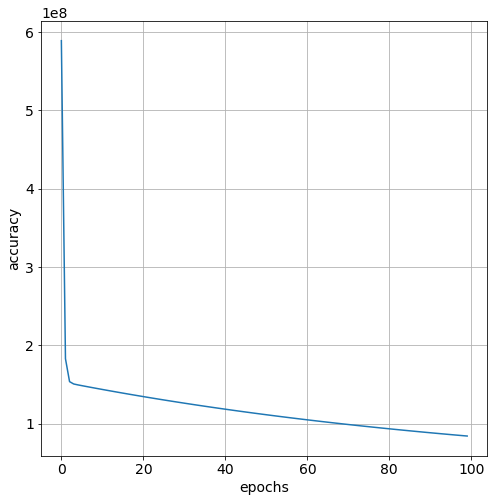

In [16]:
# To Do: plot the train loss here
plt.plot(range(epoch),losses)
#plt.legend(loc = 'best')
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.grid()
None

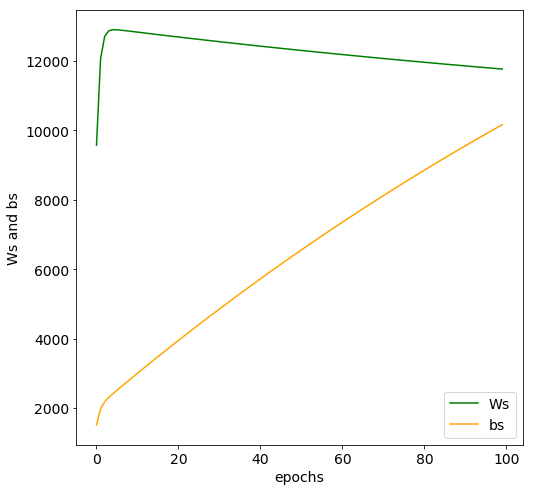

In [17]:
# To Do: plot the evolution of Ws and bs
plt.plot(range(epoch),Ws, color = 'green')
plt.plot(range(epoch),bs, color = 'orange')
plt.legend(['Ws','bs'], loc = 'lower right')
plt.xlabel('epochs')
plt.ylabel('Ws and bs')
None

In [18]:
# predict all y with last values for W and b
predicted_y = predict(X,Ws[epoch-1],bs[epoch-1])

Grad_descent_predicted_y = predicted_y

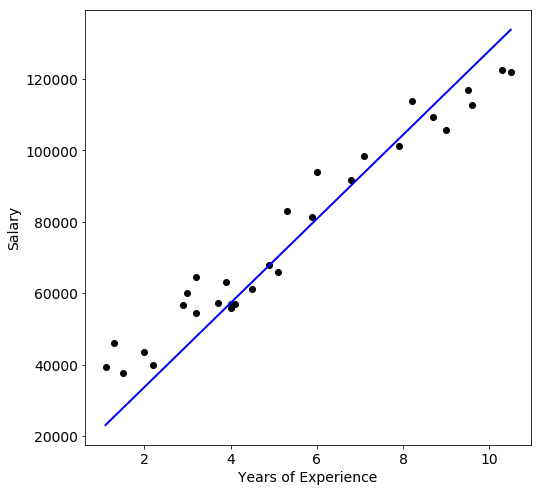

In [19]:
# To Do: plot your fit and compare it to the yesterday's fit
plt.scatter(data_x, data_y,  color = 'black')
plt.plot(data_x,predicted_y, linewidth = 2, color = 'blue')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
None

# Stochastic Gradient Descent

In [38]:
from sklearn.utils import shuffle 

# for very large data sets, gradient descent becomes very slow
# --> subsample data and perform grad descent
# more iterations with smaller batch size (~5-10% of data)


# shuffling points before each iteration, then selecting first N points 
# This obtains a less biased estimation of the true gradient.
# https://www.quora.com/Why-do-we-need-to-shuffle-inputs-for-stochastic-gradient-descent

# To Do: try different values to see how the model behaves
learning_rate = 0.001 
batch_size = 10 # small batch size = stochastic grad descent, intermediate batch = mini batch
epoch = 300

# To Do: Create a random starting W and b
W = 2450
b = 242
print('Starting value of W: %.4f and b: %.4f' % (W, b))

Ws = []
bs = []
losses = []

for n in range(epoch):

    # To Do: for each epoch we shuffle the data
    curr_data = shuffle(data)[0:batch_size] # takes a small sample of randomized data
    X = curr_data['YearsExperience']
    y = curr_data['Salary']

    new_Wb = train(X, y, learning_rate, W, b)
    W = new_Wb[0]
    b = new_Wb[1]
    # Add W to list
    Ws.append(W)
    
    # Add b to list
    bs.append(b)
    
    # Add loss to list
    train_acc = accuracy(X, y, W, b) 
    losses.append(train_acc)
    
    print('---------------------------------------------')  
    print('Value of W: %.4f and b: %.4f' % (W, b))    
    print("Epoch: ",n+1)
    print("Learning Rate: ",learning_rate)
    print("Loss: ",train_acc)

print('---------------------------------------------')
print('Final value of W: %.4f and b: %.4f after %i epochs: using stochastic gradient decent' % (W, b, epoch))
print('---------------------------------------------')

Starting value of W: 2450.0000 and b: 242.0000
---------------------------------------------
Value of W: 3076.6837 and b: 360.5224
Epoch:  1
Learning Rate:  0.001
Loss:  3462969197.2513824
---------------------------------------------
Value of W: 3794.5302 and b: 482.3880
Epoch:  2
Learning Rate:  0.001
Loss:  3493143688.404341
---------------------------------------------
Value of W: 4329.6215 and b: 584.8994
Epoch:  3
Learning Rate:  0.001
Loss:  2563964336.896274
---------------------------------------------
Value of W: 4877.7996 and b: 683.0934
Epoch:  4
Learning Rate:  0.001
Loss:  2291809685.9476614
---------------------------------------------
Value of W: 5571.1953 and b: 787.5462
Epoch:  5
Learning Rate:  0.001
Loss:  2423284682.8865185
---------------------------------------------
Value of W: 6104.5987 and b: 876.7986
Epoch:  6
Learning Rate:  0.001
Loss:  1852154956.505675
---------------------------------------------
Value of W: 6685.5732 and b: 963.3135
Epoch:  7
Learning R

---------------------------------------------
Value of W: 12904.0559 and b: 2550.0431
Epoch:  71
Learning Rate:  0.001
Loss:  109135506.63947022
---------------------------------------------
Value of W: 12901.1360 and b: 2558.5835
Epoch:  72
Learning Rate:  0.001
Loss:  137947741.9369724
---------------------------------------------
Value of W: 12961.3758 and b: 2577.1204
Epoch:  73
Learning Rate:  0.001
Loss:  139999584.11842495
---------------------------------------------
Value of W: 12854.9314 and b: 2576.5508
Epoch:  74
Learning Rate:  0.001
Loss:  215002915.76388797
---------------------------------------------
Value of W: 12879.4829 and b: 2589.8461
Epoch:  75
Learning Rate:  0.001
Loss:  144394245.9315962
---------------------------------------------
Value of W: 12928.9975 and b: 2606.9933
Epoch:  76
Learning Rate:  0.001
Loss:  150523948.34407777
---------------------------------------------
Value of W: 12915.5551 and b: 2617.6687
Epoch:  77
Learning Rate:  0.001
Loss:  189579

Loss:  220020639.10380942
---------------------------------------------
Value of W: 12931.4883 and b: 3327.8405
Epoch:  146
Learning Rate:  0.001
Loss:  97381093.20311242
---------------------------------------------
Value of W: 12852.4821 and b: 3327.4886
Epoch:  147
Learning Rate:  0.001
Loss:  163909839.3568933
---------------------------------------------
Value of W: 12864.7049 and b: 3333.7187
Epoch:  148
Learning Rate:  0.001
Loss:  52741231.35357003
---------------------------------------------
Value of W: 12875.8187 and b: 3346.9645
Epoch:  149
Learning Rate:  0.001
Loss:  174886594.12516657
---------------------------------------------
Value of W: 12901.8588 and b: 3361.1213
Epoch:  150
Learning Rate:  0.001
Loss:  146862725.17116165
---------------------------------------------
Value of W: 12904.5742 and b: 3371.2099
Epoch:  151
Learning Rate:  0.001
Loss:  130649539.41813263
---------------------------------------------
Value of W: 12882.4231 and b: 3379.4986
Epoch:  152
Lea

---------------------------------------------
Value of W: 12784.6597 and b: 3923.0063
Epoch:  210
Learning Rate:  0.001
Loss:  103654657.98589921
---------------------------------------------
Value of W: 12754.1733 and b: 3927.3851
Epoch:  211
Learning Rate:  0.001
Loss:  144397804.00810248
---------------------------------------------
Value of W: 12763.4794 and b: 3941.6512
Epoch:  212
Learning Rate:  0.001
Loss:  170392486.70603567
---------------------------------------------
Value of W: 12720.3554 and b: 3946.3300
Epoch:  213
Learning Rate:  0.001
Loss:  176669991.51487115
---------------------------------------------
Value of W: 12696.6976 and b: 3946.4469
Epoch:  214
Learning Rate:  0.001
Loss:  38081249.65766458
---------------------------------------------
Value of W: 12662.2210 and b: 3951.2792
Epoch:  215
Learning Rate:  0.001
Loss:  137811712.79590878
---------------------------------------------
Value of W: 12687.2733 and b: 3962.1350
Epoch:  216
Learning Rate:  0.001
Loss:

Loss:  120787713.29884234
---------------------------------------------
Value of W: 12594.4930 and b: 4646.4114
Epoch:  290
Learning Rate:  0.001
Loss:  138172195.74864247
---------------------------------------------
Value of W: 12592.7272 and b: 4652.8192
Epoch:  291
Learning Rate:  0.001
Loss:  99926517.6369267
---------------------------------------------
Value of W: 12577.6953 and b: 4654.9131
Epoch:  292
Learning Rate:  0.001
Loss:  86635071.54335557
---------------------------------------------
Value of W: 12571.0427 and b: 4663.3805
Epoch:  293
Learning Rate:  0.001
Loss:  121538975.4208971
---------------------------------------------
Value of W: 12590.3754 and b: 4678.5418
Epoch:  294
Learning Rate:  0.001
Loss:  179633726.70217147
---------------------------------------------
Value of W: 12570.6661 and b: 4688.0956
Epoch:  295
Learning Rate:  0.001
Loss:  166479225.7506385
---------------------------------------------
Value of W: 12620.2992 and b: 4704.1391
Epoch:  296
Learn

Plot Data

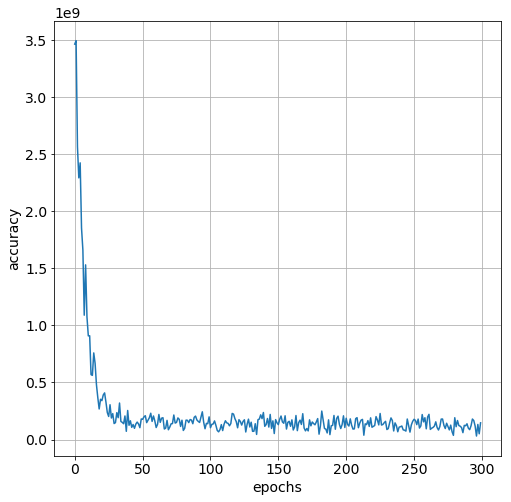

In [39]:
# To Do: plot the accuracy vs. the epochs
plt.plot(range(epoch),losses)
plt.ylabel("accuracy")
plt.xlabel("epochs");
plt.grid()
None

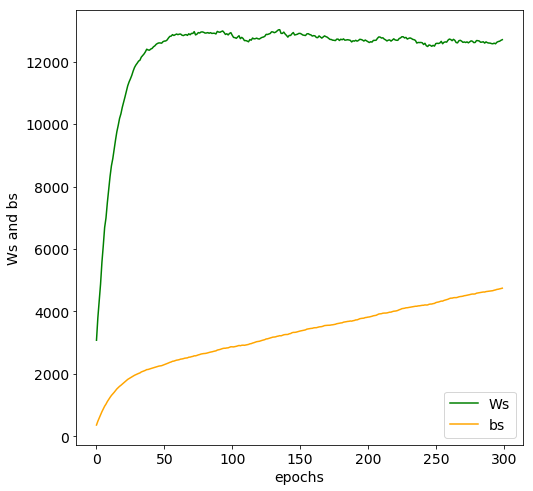

In [40]:
# To Do: the evolution of the weights and bias in each epoch
    
#plt.scatter(Ws, bs, c=range(len(Ws)))
# plt.xlabel('W')
# plt.ylabel('b')
# None

plt.plot(range(epoch),Ws, color = 'green')
plt.plot(range(epoch),bs, color = 'orange')
plt.legend(['Ws','bs'], loc = 'lower right')
plt.xlabel('epochs')
plt.ylabel('Ws and bs')
None


In [41]:
Stoch_Grad_descent_pred_y = predict(data_x,Ws[epoch-1],bs[epoch-1])


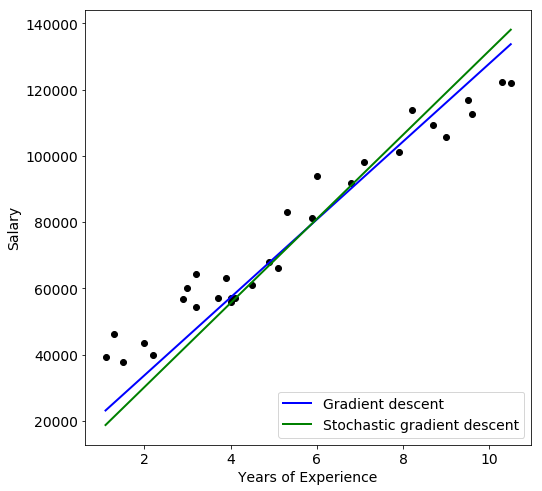

In [42]:

# To Do: plot the data the gradient descent and the stochastic gradient descent
plt.scatter(data_x, data_y,  color = 'black')
plt.plot(data_x,Grad_descent_predicted_y, linewidth = 2, color = 'blue')
plt.plot(data_x,Stoch_Grad_descent_pred_y, linewidth = 2, color = 'green')
plt.legend(['Gradient descent','Stochastic gradient descent'], loc = 'lower right')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
None